In [25]:
import IPython.display as ipd
import librosa, librosa.display
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer

In [6]:
train_path = './data/train/audio/'

In [7]:
train_audio_sample = os.path.join(train_path, "yes/0a7c2a8d_nohash_0.wav")
x,sr = librosa.load(train_audio_sample, sr = 16000)
ipd.Audio(x, rate=sr)

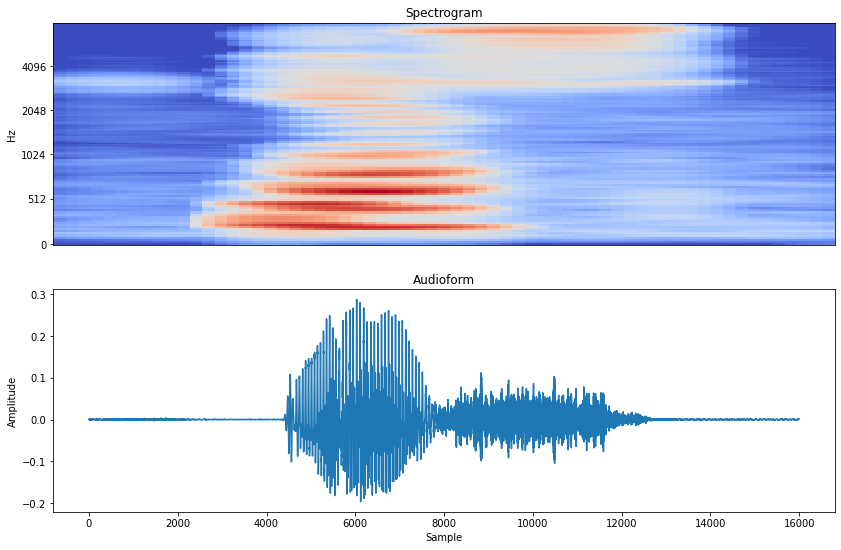

In [24]:
hop_length = 256
S = librosa.feature.melspectrogram(y = x, sr=sr, n_fft=4096, hop_length=hop_length)
logS = librosa.power_to_db(abs(S))

plt.figure(figsize=(14, 9))

plt.figure(1)

plt.subplot(211)
plt.title('Spectrogram')
librosa.display.specshow(logS, sr=sr, hop_length=hop_length, x_axis= None, y_axis='mel')
#plt.colorbar(format='%+2.0f dB')


plt.subplot(212)
plt.title('Audioform')
plt.plot(x)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.show()

In [ ]:
# mfcc

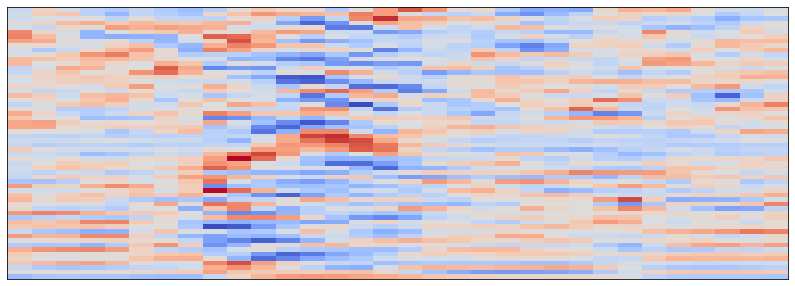

In [37]:
mfccs = librosa.feature.mfcc(y = x, sr=sr,  n_mfcc=60) 
scaler = StandardScaler()
ee= scaler.fit_transform(mfccs.T)

plt.figure(figsize=(14, 5))
librosa.display.specshow(ee.T)

In [2]:
# some audio files are not exactly 1 second long, padding should suffice
# code below transfers files from train_dir (/data/train/audio/<classes>) and test_dir (/data/test/audio) to (/data/<train|test>/padded/<classes if train>)
# for it to work, you need to create directories /data/train/padded and /data/test/padded
# all subdirectories regarding classes are created by the code :))

In [ ]:
import librosa
from librosa.util import fix_length
import soundfile as sf
import os
TRAIN_DIR = './data/train/audio/'
TEST_DIR = './data/test/audio/'
SR = 16000

In [ ]:
labels = os.listdir(TRAIN_DIR)
train_paths = []
for label in labels:
    train_paths += [TRAIN_DIR + label + '/' + path for path in os.listdir('./data/train/audio/' + label)]

test_paths = []
for path in os.listdir(TEST_DIR):
    test_paths += [TEST_DIR + path]

# padding all audio files shorter than 1s

In [ ]:
for label in os.listdir('./data/train/audio'):
    if label == 'bed':
        continue
    os.mkdir('./data/train/padded/' + label)

In [ ]:
for path in train_paths:
    try:
        x, sr = librosa.load(path, sr = SR)
    except:
        print(path + 'unable to load with librosa')
    if len(x) <= 16000:
        padded_audio = fix_length(x, size=SR)
    elif len(x) > 16000:
        print(path + f' audio file is longer than 1s, {len(x)/SR}')
    
    newpath = path.replace('audio', 'padded')
    sf.write(newpath, padded_audio, samplerate=SR)

./data/train/audio/_background_noise_/doing_the_dishes.wav audio file is longer than 1s, 1522930
./data/train/audio/_background_noise_/dude_miaowing.wav audio file is longer than 1s, 988891
./data/train/audio/_background_noise_/exercise_bike.wav audio file is longer than 1s, 980062
./data/train/audio/_background_noise_/pink_noise.wav audio file is longer than 1s, 960000


C:\Users\mipec\AppData\Local\Temp\ipykernel_11516\3342821842.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load(path, sr = SR)
C:\Users\mipec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


NoBackendError: 

In [ ]:
for path in test_paths:
    try:
        x, sr = librosa.load(path, sr = SR)
    except:
        print(path + 'unable to load with librosa')
    if len(x) <= 16000:
        padded_audio = fix_length(x, size=SR)
    elif len(x) > 16000:
        print(path + f' audio file is longer than 1s, {len(x)/SR}')
    
    newpath = path.replace('audio', 'padded')
    sf.write(newpath, padded_audio, samplerate=SR)